# 5 Dropout and Batch Normalization
Deep Learning Kaggle course tutorial: https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization
## Dropout
"dropout layer" can help correct overfitting. same idea with random forests.
By dropping out some layers, making it much harder for the network to learn spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust. 
## Batch Normalization
- Given a mini-batch of size m for a layer(x1,x2,x3...) be the inputs for each feature. BatchNorm computes the normalized output y for each input as follows: yi = (xi – mean) / sqrt(variance + ε)
- This normalization used to improve training stability and speed up convergence. 
- It was intruduced to address issues related to internal covariate shift, which is the change in the distribution of the inputs to a neural network's layer during training. 

### Preparation

In [5]:
import matplotlib.pyplot as plt 

plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
        titleweight='bold', titlesize=18, titlepad=10)

import pandas as pd
red_wine = pd.read_csv('red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


I got an error saying that `seaborn-whitegrid` is not a valid package style. `seaborn-whitegrid` is used in the Kaggle tutorial. Since it is not valid in my code, I searched for the valid style as follows and chose the closest one, `seaborn-v0_8-whitegrid` instead.

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Adding Dropout and BatchNormalization to the model
increased the number of units in the `Dense` layers.

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

### Set up the training

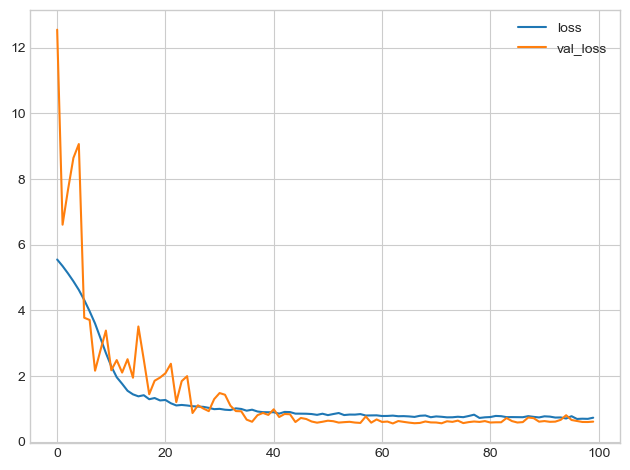

In [8]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid,y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot();